Importing necessary libraries

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("andonians/random-linear-regression")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\91959\.cache\kagglehub\datasets\andonians\random-linear-regression\versions\2


Accessing the data

In [ ]:
data = pd.read_csv(r'C:\Users\91959\Downloads\archive (2)\train.csv')
data.head()

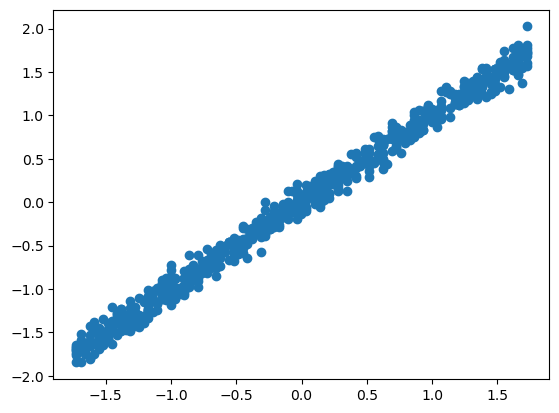

In [10]:
plt.scatter(data.x, data.y)
plt.show()

Builiding Linear Regression from scratch

Epoch    0 → loss = 0.959449,  m = 0.019878,  b = -0.000000
Epoch  100 → loss = 0.026094,  m = 0.865596,  b = -0.000000
Epoch  200 → loss = 0.009583,  m = 0.978083,  b = 0.000000
Epoch  300 → loss = 0.009290,  m = 0.993045,  b = 0.000000
Epoch  400 → loss = 0.009285,  m = 0.995035,  b = 0.000000
Epoch  500 → loss = 0.009285,  m = 0.995299,  b = 0.000000

Final parameters:
  m (slope)     = 0.995334
  b (intercept) = 0.000000


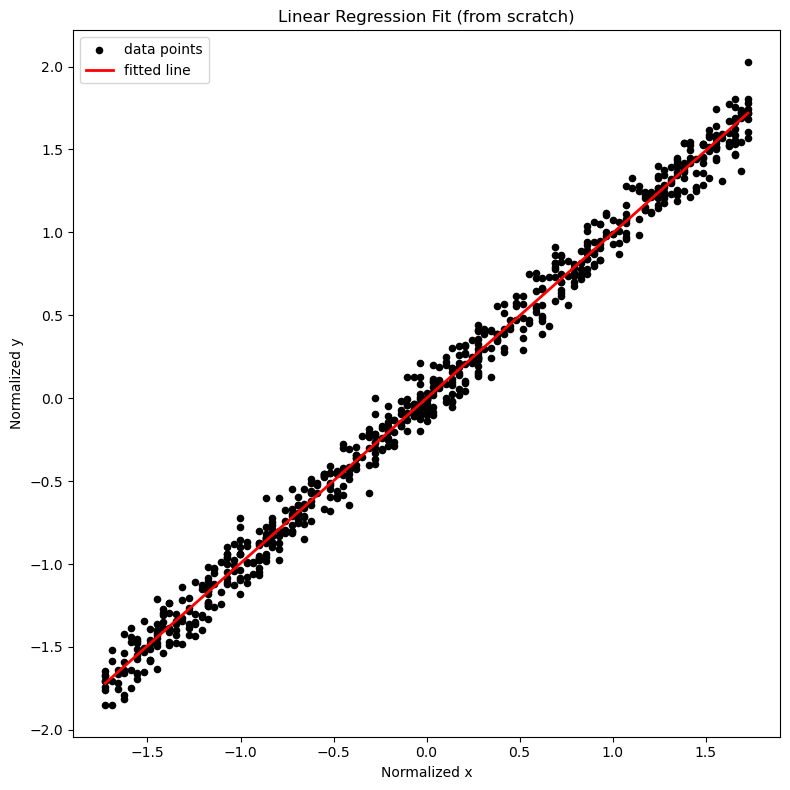

In [12]:
# 1) DROP ANY ROWS WHERE x OR y IS MISSING
data = data.dropna(subset=["x", "y"])

# 2) NORMALIZE x AND y (mean=0, std=1)
#    This step is critical so that gradient descent does not diverge.
#    We overwrite the original x/y with their normalized versions.
if data['x'].std() != 0:
    data['x'] = (data['x'] - data['x'].mean()) / data['x'].std()
else:
    raise ValueError("All x-values are identical; cannot normalize.")

if data['y'].std() != 0:
    data['y'] = (data['y'] - data['y'].mean()) / data['y'].std()
else:
    raise ValueError("All y-values are identical; cannot normalize.")

# 3) DEFINE THE LOSS FUNCTION (Mean Squared Error)
def loss_function(m, b, points):
    total_error = 0.0
    for i in range(len(points)):
        x_i = points.iloc[i].x
        y_i = points.iloc[i].y
        total_error += (y_i - (m * x_i + b)) ** 2
    return total_error / float(len(points))

# 4) DEFINE THE GRADIENT DESCENT STEP
def gradient_descent(m_current, b_current, points, learning_rate):
    m_grad = 0.0
    b_grad = 0.0
    n = float(len(points))
    for i in range(len(points)):
        x_i = points.iloc[i].x
        y_i = points.iloc[i].y
        # partial derivative wrt m = -(2/n) * x * (y - (m*x + b))
        m_grad += -(2.0 / n) * x_i * (y_i - (m_current * x_i + b_current))
        # partial derivative wrt b = -(2/n) * (y - (m*x + b))
        b_grad += -(2.0 / n) * (y_i - (m_current * x_i + b_current))
    # Update rules
    new_m = m_current - (learning_rate * m_grad)
    new_b = b_current - (learning_rate * b_grad)
    return new_m, new_b

# 5) TRAINING LOOP
m = 0.0     # initial slope
b = 0.0     # initial intercept
learning_rate = 0.01
epochs = 600

for epoch in range(epochs):
    m, b = gradient_descent(m, b, data, learning_rate)
    if epoch % 100 == 0:
        current_loss = loss_function(m, b, data)
        print(f"Epoch {epoch:4d} → loss = {current_loss:.6f},  m = {m:.6f},  b = {b:.6f}")

print("\nFinal parameters:")
print(f"  m (slope)     = {m:.6f}")
print(f"  b (intercept) = {b:.6f}")

# 7) PLOTTING THE RESULT (on normalized axes)
plt.figure(figsize=(8, 8))
plt.scatter(data.x, data.y, color="black", s=20, label="data points")
x_vals_sorted = data.x.sort_values()
y_vals_pred = m * x_vals_sorted + b
plt.plot(x_vals_sorted, y_vals_pred, color="red", linewidth=2, label="fitted line")
plt.xlabel("Normalized x")
plt.ylabel("Normalized y")
plt.title("Linear Regression Fit (from scratch)")
plt.legend()
plt.tight_layout()
plt.show()


##### 